## PIA Estadistica: ANOVA

Integrantes: 
- Edgar Armando Ruiz Dorador 1990126
- Lizbeth Lizeth Castro Murillo 1732887
- Jorge Alexis Franco Solis 1657901

### Introducción:
Análisis de la Varianza ( ANOVA ): se utiliza para comparar las varianzas entre las medias (o el promedio) de diferentes grupos. Una variedad de contextos lo utilizan para determinar si existe alguna diferencia entre las medias de los diferentes grupos.

El programa puede recibir tablas importadas de excel.

#### Ejemplo 1(ANOVA Unidireccional):
Una compañia de petroleo se ha metido al mercado Méxicano para vender gasolina en las ciudades de Monterrey(1), Guadalajara(2) y Ciudad de México(3).

Ellos quieren saber como se esta vendiendo la gasolina en estas tres ciudades, tomando en cuenta las diferencias en la forma en la que la gente maneja entre estas tres ciudades. La compañia selecciona 10 sucursales en cada cuiudad y tabula la información con las ventas promedio de cada sucursal.

##### Hipotesis propuesta:
- H0: las ventas promedio son las mismas en todas las ciudades.
- H1: las ventas promedio son diferentes en todas las ciudades.

##### Guia de uso del programa:
1. Comenzamos importando las librerias necesarias

In [1]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

2. Importamos una tabla hecha con excel.

In [2]:
data = pd.read_excel('OWAnova.xlsx')

In [3]:
data

,Sucursal,Ciudad,Venta
0,1,1,15.00
1,2,1,13.50
2,3,1,14.20
3,4,1,13.00
4,5,1,15.00
5,6,1,11.00
6,7,1,12.50
7,8,1,16.00
8,9,1,14.25
9,10,1,13.50


- Aqui podemos observar las ciudades y lo que se vende en litros de gasolina.

3. Graficamos las ventas por ciudad

<Axes: title={'center': 'Venta'}, xlabel='Ciudad'>

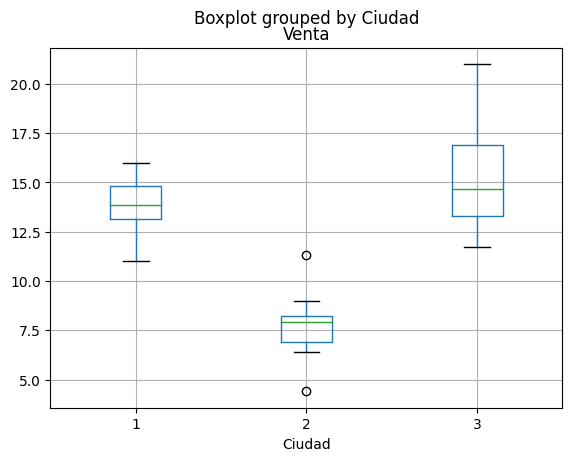

In [4]:
data.boxplot('Venta', by='Ciudad')

4. Realizamos nuestro anova para probar la hipotesis.

In [ ]:
new = ols('Venta ~ Ciudad', data=data).fit()
an = sm.stats.anova_lm(new,typ=2)

5. En la siguiente tabla podemos apreciar nuestra distribución F, suma de cuadrados, y grados de libertad

In [ ]:
an

,sum_sq,df,F,PR(>F)
Ciudad,10.804500,1.0,0.703305,0.408778
Residual,430.148917,28.0,NaN,NaN


- Como podemos observar que P = 0.408 que se acerca bastante a 0.5 (la media), entonces podemos decir que H1 se rechaza y H0 se acepta.
- Por lo tanto, H0 se acepta.

### Ejemplo 2 (ANOVA Bidireccional):
Un aspirante a la UANL esta interesado en el impacto eduacional (Artes,  Comercio y Ciencias) en cuanto terminan ganando. El tambien plantea que la experiencia en trabajos precios tambien tiene un impacto en los sueldos. Por lo tanto, el escoje la ecuación y la experiencia trabajando como sus dos variables independientes. En los estudios se categroiza en dos grupos, un grupo sera el de artes y comercio, otro sea ciencia y ingenieria. En la experiencia trabajando se categoriza en dos grupos, uno con experiencia y otro sin experiencia, Como tenemos dos niveles en cada factor, podemos decir que es 2*2. 

Una muestra aleatoria de 30 estudiantes y sus sueldos como estudiantes, asi como tambien informacion sobre su educacion y expereincia de trabajo. Para ecuación 1 representa artes y comercio y 2 ciencie e ingenieria. En la parte de la experiencia laboral 1 representa experiencia y  2 representa sin experiencia. 

### Hipotesis:
H0: la educacion con experiencia laboral no tiene impacto en el sueldo de los estudiantes.

H1: los estudiantes de ciencia con experiencia previa tendran salarios mas altos.

1. Importamos las librerias necesarias y la tabla de excel.

In [28]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
df = pd.read_excel('TWAnova.xlsx')

- Aqui se muestras los datos:

In [30]:
df

,Estudiantes,Sueldo,Educacion,Experiencia
0,1,8.50,1,1
1,2,10.80,1,1
2,3,9.70,1,1
3,4,8.80,1,1
4,5,7.80,1,2
5,6,7.50,1,1
6,7,7.80,1,1
7,8,6.90,1,1
8,9,4.50,1,2
9,10,4.10,1,2


3. Aplicamos el ANOVA bidireccional, relacionando a educacion y experiencia.

In [26]:
anova = ols('Sueldo~Educacion+Experiencia',data = df).fit()
two = sm.stats.anova_lm(anova, type = 2)

4. Como podemos observar en nuestros resultados, el ***P*** valor de educacion se encuentra mas cercano a 1/2, por lo que podemos decir que no es significativo, mientras el ***P*** valor de experiencia es mas significativo.

In [27]:
two

,df,sum_sq,mean_sq,F,PR(>F)
Educacion,1.0,1.855053,1.855053,0.695193,0.411720
Experiencia,1.0,65.835003,65.835003,24.672081,0.000033
Residual,27.0,72.046824,2.668401,NaN,NaN


Realizando las pruebas el valor de F de la experiencia es 24.672, el cual significante para P. 

Por lo tanto, H0 se rechaza y H1 se acepta


## ANOVA: Bidireccional con interaccion
Por si quedaron dudas, hacemos un ANOVA de dos direcciones con interacción:

In [43]:
anova2 = ols('Sueldo~Educacion+Experiencia+Educacion*Experiencia',data = df).fit()
inter = sm.stats.anova_lm(anova2, type = 2)

In [44]:
inter

,df,sum_sq,mean_sq,F,PR(>F)
Educacion,1.0,1.855053,1.855053,0.673331,0.419353
Experiencia,1.0,65.835003,65.835003,23.896211,0.000045
Educacion:Experiencia,1.0,0.415801,0.415801,0.150924,0.700817
Residual,26.0,71.631023,2.755039,NaN,NaN


Observando los resultados, podemos notar que el P valor de la educacion y experiencia es significante, por lo que podemos decir que el tener educación y experiencia de trabajo previo, influye en el sueldo.